>>###### Name:    Mintesnot Fikir
>>###### GitHub:    https://github.com/mintesnot96
>>###### Name:    mints4god@gmail.com

# Ethiopia Public Health Institute
## National Data Management Center
### Data Analytics, Modeling and Visualization Division

>
>

Part I: Overview

1. Objective of the data Challenge

The objective of this data challenge is to explore the intern’s analytical skill and to imagine their problem-solving skill by providing them with real word problems organizations face on daily basis. In doing so, a data science modeling challenge that assesses students mathematical, programming and problem conceptualization skill has been prepared.

2. Description of the CHAMPS Dataset

In this data challenge, Child Health and Mortality Prevention Surveillance (CHAMPS) dataset has been provided to the interns. The purpose of the CHAMPS Surveillance dataset was to collect, analyze, and share data to help identify the causes of child deaths in areas with high child mortality. For the child mortality dataset, there are underlying cause of death from the infant side and also maternal factors contributing to this death. For ease of understanding, variable names and their possible values have been decoded in table 1 below

3.	Dataset name: Champs.csv
   
| S/N | Variable/Field Name | Field Label | Field Attributes (Field Type, Validation, Choices, Calculations, etc.) |
|-----|---------------------|-------------|----------------------------------------------------------------------|
| 1   | champs_id           | CHAMPS_ID (Mortality) | text, Required                                                         |
| 2   | dp_013              | Case Type   | CH00716: Stillbirth CH01404: Death in the first 24 hours CH01405: Early Neonate (1 to 6 days) CH01406: Late Neonate (7 to 27 days) CH00718: Infant (28 days to less than 12 months) CH00719: Child (12 months to less than 60 months) |
| 3   | dp_108              | Underlying Cause | Underlying cause or factor/ Main condition in fetus or infant They are labeled "Undetermined" if no cause of death was determined by the panel | text, Required                                                         |
| 4   | dp_118              | Main maternal disease condition affecting the child/fetus | text                                                                 |







**Part II: Problem Solving Section:**

Note:  While we understand that you might be comfortable with other data analytic languages and environment, for the sake of this data challenge, the center dictates you to use the python/R language and packages alone.


1.	Preprocessing and EDA:  

Based on the given dataset(champs.csv) and the decoded variables in table 1, do the following preprocessing and Exploratory Data Analysis (EDA)
A.	Read the dataset
B.	How many rows and columns are they in the dataset
C.	Enumerate the columns of the dataset
D.	Rename the columns.  Example: rename column dp_013 to case_type
E.	Rename values.  Example: rename CH00716 to Stillbirth. Do the same for others too.
F.	Show the proportion of null values in each column.

2.	Descriptive Data analysis: looking back to the dataset above

A.	What are the magnitude and proportion of each of the infant underlying cause for child death?
B.	What are the proportion and magnitude of the maternal factors contributing for child death?
C.	What are the proportion of the child death by the case type

3.	Correlation analysis: Using correlation or Heat Maps, show how each of the infant under lying conditions and maternal factors are correlated to the top three causes of the child death identified above under 2(A)

4.	Feature engineering:  You are expected to select the top infant underlying causes and maternal factors(features) that would contribute to the top three causes of child death identified under 2(A) above. For this, you need to select the best and likely features. In doing so:

A.	Select the classification models LogisticRegression, Support Vector Machine, AdaBoostClassifier,  Random Forest Classifier ,  Gradient Boosting Classifier  and XGBOOST and train  each on the dataset
B.	Import the appropriate package for each of the classification models above
C.	Rank the features based on their importance for each of the top underlying causes of child death identified above under 2(A), for each of the classification algorithms under (A )

5.	Model evaluation using the proper metrics

A.	Import the appropriate evaluation metric packages
B.	Using the appropriate n-fold cross validation and out of sample data, select the best preforming model from the candidate models under 4(A)
C.	Ensemble the models and see the performance  of the  combination models on the data
D.	Use Accuracy score metrics to evaluate the performance of the models above
E.	Plot the AUC and ROC curve on the same graph to visualize and compare the performance of each of the models above

6.	Result Visualization: Import the appropriate visualization package and:

A.	Plot the feature importance in descending order for each of the models using horizontal bar chart
B.	Plot the top five infant underlying causes of the child death
C.	Plot the top five maternal factors contributing to the child death
D.	Plot the child death based on the case types

### Mount google drive folder and load CHAMPS.csv file from NDMC folder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from  google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/forcolab/NDMC

df = pd.read_csv('CHAMPS.csv')

# Solution


## **1.Preprocessing and EDA:**

Based on the given dataset(champs.csv) and the decoded variables in table 1, do the following preprocessing and Exploratory Data Analysis (EDA)
A.	Read the dataset
B.	How many rows and columns are they in the dataset
C.	Enumerate the columns of the dataset
D.	Rename the columns.  Example: rename column dp_013 to case_type
E.	Rename values.  Example: rename CH00716 to Stillbirth. Do the same for others too.
F.	Show the proportion of null values in each column.


In [3]:
# A.	Read the dataset
# Navigate to the NDMC folder and load the CHAMPS.csv file

# df = pd.read_csv('CHAMPS.csv')
df.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [4]:
# B.	How many rows and columns are they in the dataset
rows, columns = df.shape
print('Number of rows = ',rows)
print('Number of columns = ',columns)

Number of rows =  444
Number of columns =  381


In [5]:
# C.	Enumerate the columns of the dataset
all_columns = df.columns.tolist()
print(all_columns)

['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002', 'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007', 'dp_008', 'dp_009', 'dp_010', 'dp_011', 'dp_012', 'dp_013', 'dp_153', 'dp_016', 'dp_017', 'dp_154', 'dp_155', 'dp_014', 'dp_108', 'dp_109', 'dp_110', 'dp_111', 'dp_112', 'dp_113', 'dp_114', 'dp_115', 'dp_116', 'dp_117', 'dp_157', 'dp_018', 'dp_019', 'dp_020', 'dp_021', 'dp_022', 'dp_023', 'dp_024', 'dp_025', 'dp_026', 'dp_027', 'dp_156', 'dp_028', 'dp_029', 'dp_030', 'dp_031', 'dp_032', 'dp_033', 'dp_034', 'dp_035', 'dp_036', 'dp_037', 'dp_038', 'dp_039', 'dp_040', 'dp_041', 'dp_042', 'dp_043', 'dp_044', 'dp_045', 'dp_046', 'dp_047', 'dp_048', 'dp_049', 'dp_050', 'dp_051', 'dp_052', 'dp_053', 'dp_054', 'dp_055', 'dp_056', 'dp_057', 'dp_058', 'dp_059', 'dp_060', 'dp_061', 'dp_062', 'dp_063', 'dp_064', 'dp_065', 'dp_066', 'dp_067', 'dp_068', 'dp_069', 'dp_070', 'dp_071', 'dp_072', 'dp_073', 'dp_074', 'dp_075', 'dp_076', 'dp_077', 'dp_078', 'dp_079', 'dp_080', 'dp_081', '

In [6]:
# D.	Rename the columns.  Example: rename column dp_013 to case_type
df.rename(columns={
    'champs_id': 'CHAMPS_ID',
    'dp_013': 'case_type',
    'dp_108': 'underlying_cause',
    'dp_118': 'maternal_disease'
}, inplace=True)

In [7]:
target_columns = ['CHAMPS_ID','case_type', 'underlying_cause', 'maternal_disease']
df.loc[:, target_columns].head()

,CHAMPS_ID,case_type,underlying_cause,maternal_disease
0,ETAA00002,CH00716,Undetermined,Undetermined
1,ETAA00004,CH00716,Undetermined,Undetermined
2,ETAA00005,CH00716,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...
3,ETAA00008,CH00719,Severe acute malnutrition - Kwashiorkor,NaN
4,ETAA00009,CH01406,Sepsis,NaN


In [8]:
# E.Rename values.  Example: rename CH00716 to Stillbirth. Do the same for others too.
df['case_type'].replace({
    'CH00716': 'Stillbirth',
    'CH01404': 'Death in the first 24 hours',
    'CH01405': 'Early Neonate (1 to 6 days)',
    'CH01406': 'Late Neonate (7 to 27 days)',
    'CH00718': 'Infant (28 days to less than 12 months)',
    'CH00719': 'Child (12 months to less than 60 months)'
}, inplace=True)

df['case_type'].head()


0                                  Stillbirth
1                                  Stillbirth
2                                  Stillbirth
3    Child (12 months to less than 60 months)
4                 Late Neonate (7 to 27 days)
Name: case_type, dtype: object

In [9]:
# F: Show the proportion of null values in each column
null_proportions = df.isnull().mean()

rows, columns, all_columns, df.head(), null_proportions

rows, columns = df.shape


print('\n All_columns \n ')
print(all_columns)

df.head()
print('')
print('')
print('\nNull_proportions for all columns\n')
print(null_proportions)

newcolumns = ['case_type', 'underlying_cause', 'maternal_disease_condition']
null_proportion_target = df[target_columns].isnull().mean()
print('\nProportion of null values in new columns: \n')
print(null_proportion_target)


 All_columns 
 
['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002', 'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007', 'dp_008', 'dp_009', 'dp_010', 'dp_011', 'dp_012', 'dp_013', 'dp_153', 'dp_016', 'dp_017', 'dp_154', 'dp_155', 'dp_014', 'dp_108', 'dp_109', 'dp_110', 'dp_111', 'dp_112', 'dp_113', 'dp_114', 'dp_115', 'dp_116', 'dp_117', 'dp_157', 'dp_018', 'dp_019', 'dp_020', 'dp_021', 'dp_022', 'dp_023', 'dp_024', 'dp_025', 'dp_026', 'dp_027', 'dp_156', 'dp_028', 'dp_029', 'dp_030', 'dp_031', 'dp_032', 'dp_033', 'dp_034', 'dp_035', 'dp_036', 'dp_037', 'dp_038', 'dp_039', 'dp_040', 'dp_041', 'dp_042', 'dp_043', 'dp_044', 'dp_045', 'dp_046', 'dp_047', 'dp_048', 'dp_049', 'dp_050', 'dp_051', 'dp_052', 'dp_053', 'dp_054', 'dp_055', 'dp_056', 'dp_057', 'dp_058', 'dp_059', 'dp_060', 'dp_061', 'dp_062', 'dp_063', 'dp_064', 'dp_065', 'dp_066', 'dp_067', 'dp_068', 'dp_069', 'dp_070', 'dp_071', 'dp_072', 'dp_073', 'dp_074', 'dp_075', 'dp_076', 'dp_077', 'dp_078', 'dp_079', 'dp_

## **2.Descriptive Data analysis: looking back to the dataset above**

A.	What are the magnitude and proportion of each of the infant underlying cause for child death?

B.	What are the proportion and magnitude of the maternal factors contributing for child death?

C.	What are the proportion of the child death by the case type


In [10]:
# A. Calculate the magnitude and proportion of each underlying cause of infant death
cause_counts = df['underlying_cause'].value_counts()
cause_props = df['underlying_cause'].value_counts(normalize=True)

res_df = pd.DataFrame({
    'Cause': cause_counts.index,
    'Magnitude': cause_counts.values,
    'Proportion': cause_props.values
})

res_df.index = res_df.index + 1

print('A. Magnitude and proportion of each underlying cause of infant death:')
res_df.head(100)


A. Magnitude and proportion of each underlying cause of infant death:


,Cause,Magnitude,Proportion
1,Intrauterine hypoxia,148,0.333333
2,Birth asphyxia,33,0.074324
3,Undetermined,28,0.063063
4,Severe acute malnutrition,24,0.054054
5,Craniorachischisis,16,0.036036
...,...,...,...
93,Severe acute malnutrition-Kwashiorkor,1,0.002252
94,"severe acute malnutrition, Marasmic Kwashiorkor",1,0.002252
95,Severe acute malnutrition - Marasmic kwashiorkor,1,0.002252
96,Congenital CMV infection,1,0.002252


In [11]:
# B. Proportion and magnitude of maternal factors contributing to child death
mat_counts = df['maternal_disease'].value_counts()
mat_props = df['maternal_disease'].value_counts(normalize=True)

# Create a DataFrame to display the results in a table format
mat_factors_df = pd.DataFrame({
    'Condition': mat_counts.index,
    'Magnitude': mat_counts.values,
    'Proportion': mat_props.values
})

# Adjust the index to start from 1
mat_factors_df.index = mat_factors_df.index + 1

# Display the first 100 rows of the result
print('B. Magnitude and proportion of maternal factors contributing to child death:')
mat_factors_df.head(100)


B. Magnitude and proportion of maternal factors contributing to child death:


,Condition,Magnitude,Proportion
1,Preeclampsia,36,0.182741
2,Twin pregnancy,12,0.060914
3,Fetus and newborn affected by other forms of p...,11,0.055838
4,Eclampsia,9,0.045685
5,Fetus and newborn affected by other forms of p...,5,0.025381
...,...,...,...
93,Fetus and newborn affected by oligohydramnios,1,0.005076
94,Fetus and newborn affected by maternal diabetes,1,0.005076
95,Fetus and newborn affected by maternal infecti...,1,0.005076
96,Fetus and newborn affected by multiple pregnan...,1,0.005076


In [12]:
# C. Proportion of child death by case type
# Calculate proportion of child deaths by case type
case_props = df['case_type'].value_counts(normalize=True)

# Create a DataFrame to display in a table format
case_df = pd.DataFrame({
    'Case Type': case_props.index,
    'Proportion': case_props.values
})

# Adjust the index to start from 1
case_df.index = case_df.index + 1

# Display the first 100 rows of the result
print('C. Proportion of child death by case type:')
case_df.head(100)


C. Proportion of child death by case type:


,Case Type,Proportion
1,Stillbirth,0.538288
2,Death in the first 24 hours,0.155405
3,Early Neonate (1 to 6 days),0.110360
4,Child (12 months to less than 60 months),0.094595
5,Infant (28 days to less than 12 months),0.060811
6,Late Neonate (7 to 27 days),0.040541


## **3.	Correlation analysis:**

Using correlation or Heat Maps, show how each of the infant under lying conditions and maternal factors are correlated to the top three causes of the child death identified above under 2(A)

In [13]:
print('Magnitude and proportion of each infant underlying cause for child death:')
res_df.head(3)

Magnitude and proportion of each infant underlying cause for child death:


,Cause,Magnitude,Proportion
1,Intrauterine hypoxia,148,0.333333
2,Birth asphyxia,33,0.074324
3,Undetermined,28,0.063063


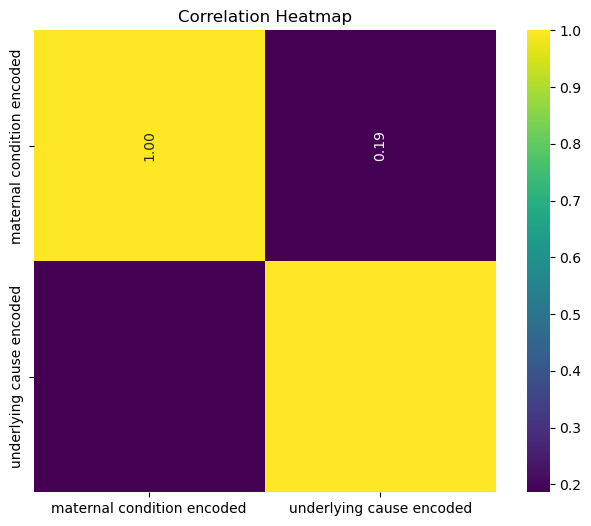

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

top_three_categories = res_df['Cause'].head(3).tolist()

filtered_df = df[df['underlying_cause'].isin(top_three_categories)][['maternal_disease', 'underlying_cause']]

le = LabelEncoder()

filtered_df['maternal_condition_encoded'] = le.fit_transform(filtered_df['maternal_disease'])

filtered_df['underlying_cause_encoded'] = le.fit_transform(filtered_df['underlying_cause'])

correlation_matrix = filtered_df[['maternal_condition_encoded', 'underlying_cause_encoded']].corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", cbar=True, square=True,
                      annot_kws={"rotation": 90})

heatmap.set_xticklabels([label.replace('_', ' ') for label in correlation_matrix.columns])
heatmap.set_yticklabels([label.replace('_', ' ') for label in correlation_matrix.columns])

plt.title('Correlation Heatmap')
plt.show()

##### **Interpretation:**
- The correlation matrix indicates a weak positive correlation of 0.186 between maternal disease and underlying cause of child death. This suggests that while there's some association between the two, maternal disease plays a relatively minor role in directly causing child mortality in this dataset. The underlying cause of death seems to be influenced by other factors not captured in this analysis.

- This weak correlation the assumption that maternal disease is a primary driver of child mortality.
- It suggests that interventions focused solely on improving maternal health may not significantly reduce child mortality rates.
- Instead, a broader approach addressing other underlying causes, such as infectious diseases, neonatal complications, or environmental factors, might be more effective.

## **4.	Feature engineering:**  
You are expected to select the top infant underlying causes and maternal factors(features) that would contribute to the top three causes of child death identified under 2(A) above. For this, you need to select the best and likely features. In doing so:



A.  Select the classification models LogisticRegression, Support Vector Machine, AdaBoostClassifier,  Random Forest Classifier ,  Gradient Boosting Classifier  and XGBOOST and train  each on the dataset

B.  Import the appropriate package for each of the classification models above

C. 	Rank the features based on their importance for each of the top underlying causes of child death identified above under 2(A), for each of the classification algorithms under (A )


#### 4 B.	Import the appropriate package for each of the classification models above

In [15]:
# B. Import the appropriate package for each of the classification models above
import textwrap
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import cycle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._weight_boosting")
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd

#### 4. Feature engineering: Selecting features and preparing the dataset

In [16]:
class ToDenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return np.asarray(X.todense())
# Define feature and target variables
X = df[['underlying_cause', 'maternal_disease']]
y = df['case_type']
# Encode target variable
le_case_type = LabelEncoder()
y_encoded = le_case_type.fit_transform(y)
encoder = ColumnTransformer(# Encode feature variables
    transformers=[
        ('cat', OneHotEncoder(), ['underlying_cause', 'maternal_disease'])
    ])
# Define preprocessing for encoded features
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_dense', ToDenseTransformer()),
    ('scaler', RobustScaler())
])
# Combine encoding and preprocessing steps
full_pipeline = Pipeline(steps=[
    ('encoder', encoder),
    ('preprocessor', preprocessor)
])

# Transform the features
X_encoded = full_pipeline.fit_transform(X)

#### 4 A. Select the classification models LogisticRegression, Support Vector Machine, AdaBoostClassifier, Random Forest Classifier, Gradient Boosting Classifier, and XGBOOST and train each on the dataset

In [17]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(kernel='linear', probability=True),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier()
}



best_model_name = None
best_model_score = 0
for model_name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_encoded, y_encoded, cv=kf, scoring='accuracy')
    mean_score = scores.mean()
    print(f'{model_name} - Accuracy: {mean_score:.4f}')

    if mean_score > best_model_score:
        best_model_score = mean_score
        best_model_name = model_name

LogisticRegression - Accuracy: 0.6869
SVC - Accuracy: 0.6869
AdaBoostClassifier - Accuracy: 0.5767
RandomForestClassifier - Accuracy: 0.6891
GradientBoostingClassifier - Accuracy: 0.6869
XGBClassifier - Accuracy: 0.6645


#### C. Rank the features based on their importance for each of the top underlying causes of child death identified above under 2(A), for each of the classification algorithms under (A)
Feature importance ranking will vary based on the model used. Here is an example of how you might rank features using one model (e.g., RandomForestClassifier):

In [18]:
feature_importances = {}

for model_name, model in models.items():
    model.fit(X_encoded, y_encoded)
    
    if model_name in ['RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'XGBClassifier']:
        importances = model.feature_importances_
    elif model_name == 'LogisticRegression':
        importances = np.abs(model.coef_[0])
    elif model_name == 'SVC':
        importances = np.abs(model.coef_[0])
    
    feature_importances[model_name] = importances

feature_names = full_pipeline.named_steps['encoder'].transformers_[0][1].get_feature_names_out(['underlying_cause', 'maternal_disease'])

feature_importances_df = pd.DataFrame(feature_importances, index=feature_names)

ranked_features = feature_importances_df.rank(ascending=False, method='min')
ranked_features['Mean Rank'] = ranked_features.mean(axis=1)
ranked_features = ranked_features.sort_values(by='Mean Rank')

print(ranked_features)


                                                    LogisticRegression   SVC  \
underlying_cause_Intrauterine hypoxia                              6.0   2.0   
underlying_cause_Birth asphyxia                                    7.0   2.0   
maternal_disease_nan                                               2.0   4.0   
underlying_cause_Severe acute malnutrition                         1.0  17.0   
underlying_cause_Meconium aspiration syndrome                     21.0   1.0   
...                                                                ...   ...   
maternal_disease_Precipitated labour                             168.0  52.0   
maternal_disease_Fetus and newborn affected by ...               168.0  52.0   
maternal_disease_Fetus and newborn affected by ...               168.0  52.0   
maternal_disease_Fetus and newborn affected by ...               168.0  52.0   
maternal_disease_Fetus and newborn affected by ...               168.0  52.0   

                                       

The analysis ranks features based on their importance across multiple classification models. Here is an interpretation of the results:

**Top Features**
1. underlying_cause_Intrauterine hypoxia

- Mean Rank: 4.67
- This feature consistently ranks highly across all models, indicating it is a crucial factor in predicting child death. It is the top feature in RandomForestClassifier and GradientBoostingClassifier, and ranks second in SVC.
  
2. underlying_cause_Birth asphyxia

- Mean Rank: 5.83
- Another critical feature, with high importance across most models. It is particularly significant in RandomForestClassifier, GradientBoostingClassifier, and SVC.
  
3. maternal_disease_nan

- Mean Rank: 6.17
- This feature represents cases with no specific maternal disease listed. It shows high importance across several models, suggesting that the absence of documented maternal disease can still be a significant indicator in predicting child deaths.
  
4. underlying_cause_Severe acute malnutrition

- Mean Rank: 7.50
- This feature ranks consistently within the top features across all models. Severe acute malnutrition is a well-known risk factor for child mortality.
  
5. underlying_cause_Meconium aspiration syndrome

- Mean Rank: 10.33
- Although it ranks lower than the top four features, it still holds significant importance, especially in the SVC model where it ranks first.
  
Interpretation
- The top features primarily consist of specific underlying causes of child death such as intrauterine hypoxia, birth asphyxia, and severe acute malnutrition. These are medical conditions directly affecting infants, which align with known critical factors contributing to infant mortality.
The presence of maternal_disease_nan among the top features indicates that the absence of documented maternal diseases is also an important factor, perhaps due to unrecorded complications or socioeconomic factors not captured in the dataset.

**Regarding Lower-ranked Features**
- The features with the lowest ranks (e.g., maternal_disease_Precipitated labour, various Fetus and newborn affected by ... categories) indicate less importance in predicting child deaths across all models. Their high rank values (close to or above 100) show that these factors are less significant compared to the top features.



## 5.	Model evaluation using the proper metrics
A.	Import the appropriate evaluation metric packages

B.	Using the appropriate n-fold cross validation and out of sample data, select the best preforming model from the candidate models under 4(A)

C.	Ensemble the models and see the performance  of the  combination models on the data

D.	Use Accuracy score metrics to evaluate the performance of the models above

E.	Plot the AUC and ROC curve on the same graph to visualize and compare the performance of each of the models above


#### 5 A. Import the Appropriate Evaluation Metric Packages

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import VotingClassifier

#### 5 B. Using the Appropriate n-fold Cross Validation and Out of Sample Data, Select the Best Performing Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_model_name = None
best_model_score = 0
model_scores = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = cv_scores.mean()
    model_scores[model_name] = mean_score
    print(f'{model_name} - Cross-Validation Accuracy: {mean_score:.4f}')

    if mean_score > best_model_score:
        best_model_score = mean_score
        best_model_name = model_name

print(f'Best Performing Model: {best_model_name} with Accuracy: {best_model_score:.4f}')


LogisticRegression - Cross-Validation Accuracy: 0.6761
SVC - Cross-Validation Accuracy: 0.6873
AdaBoostClassifier - Cross-Validation Accuracy: 0.6028
RandomForestClassifier - Cross-Validation Accuracy: 0.6676
GradientBoostingClassifier - Cross-Validation Accuracy: 0.6676
XGBClassifier - Cross-Validation Accuracy: 0.6535
Best Performing Model: SVC with Accuracy: 0.6873


#### 5 C. Ensemble the Models and See the Performance of the Combination Models on the Data

In [30]:
ensemble_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('ada', AdaBoostClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('xgb', XGBClassifier())
], voting='soft')  

ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print(f'Ensemble Model Accuracy: {ensemble_accuracy:.4f}')


Ensemble Model Accuracy: 0.7191


#### 5 D. Use Accuracy Score Metrics to Evaluate the Performance of the Models Above

In [31]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    
    print(f'{model_name} - Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}')

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)
ensemble_recall = recall_score(y_test, y_pred_ensemble, average='weighted')
ensemble_f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
ensemble_roc_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test), multi_class='ovr')

print(f'Ensemble Model - Test Accuracy: {ensemble_accuracy:.4f}, Precision: {ensemble_precision:.4f}, Recall: {ensemble_recall:.4f}, F1 Score: {ensemble_f1:.4f}, ROC AUC: {ensemble_roc_auc:.4f}')


LogisticRegression - Test Accuracy: 0.7191, Precision: 0.7365, Recall: 0.7191, F1 Score: 0.6536, ROC AUC: 0.8657
SVC - Test Accuracy: 0.7079, Precision: 0.7209, Recall: 0.7079, F1 Score: 0.6446, ROC AUC: 0.8599
AdaBoostClassifier - Test Accuracy: 0.6517, Precision: 0.6611, Recall: 0.6517, F1 Score: 0.5878, ROC AUC: 0.7474
RandomForestClassifier - Test Accuracy: 0.7303, Precision: 0.7307, Recall: 0.7303, F1 Score: 0.6872, ROC AUC: 0.8584
GradientBoostingClassifier - Test Accuracy: 0.7303, Precision: 0.7242, Recall: 0.7303, F1 Score: 0.6886, ROC AUC: 0.8482
XGBClassifier - Test Accuracy: 0.6966, Precision: 0.6518, Recall: 0.6966, F1 Score: 0.6268, ROC AUC: 0.8223
Ensemble Model - Test Accuracy: 0.7191, Precision: 0.7365, Recall: 0.7191, F1 Score: 0.6536, ROC AUC: 0.8747


#### 5 E. Plot the AUC and ROC Curve on the Same Graph to Visualize and Compare the Performance of Each of the Models

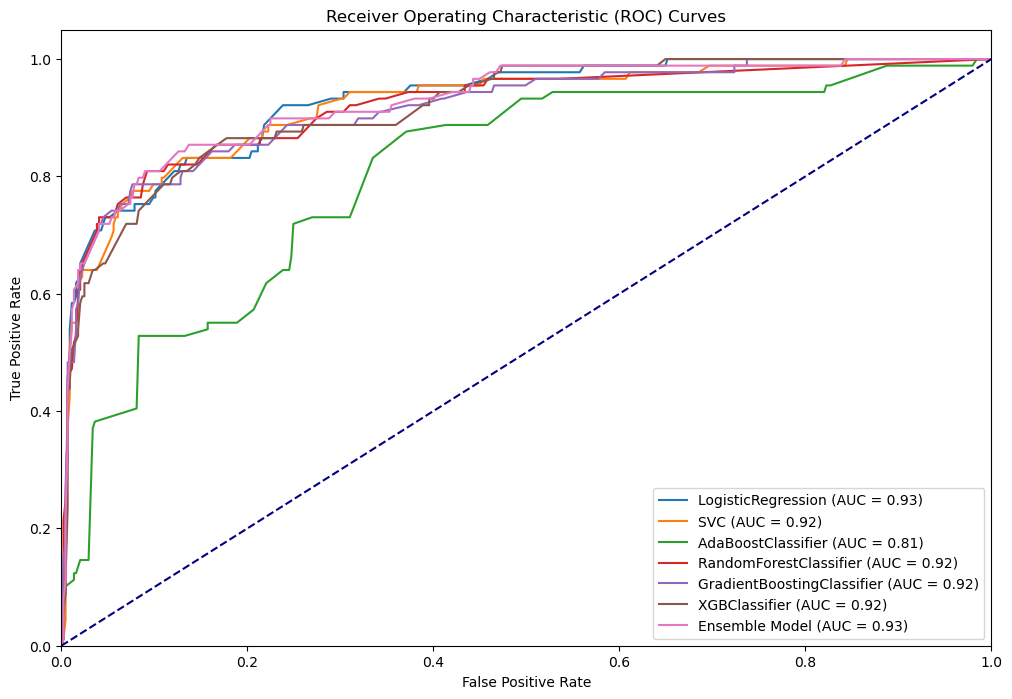

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=range(len(le_case_type.classes_)))

plt.figure(figsize=(12, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(le_case_type.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')

ensemble_model.fit(X_train, y_train)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)

fpr_ensemble = {}
tpr_ensemble = {}
roc_auc_ensemble = {}

for i in range(len(le_case_type.classes_)):
    fpr_ensemble[i], tpr_ensemble[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_ensemble[:, i])
    roc_auc_ensemble[i] = auc(fpr_ensemble[i], tpr_ensemble[i])

fpr_ensemble["micro"], tpr_ensemble["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_ensemble.ravel())
roc_auc_ensemble["micro"] = auc(fpr_ensemble["micro"], tpr_ensemble["micro"])

plt.plot(fpr_ensemble["micro"], tpr_ensemble["micro"], label=f'Ensemble Model (AUC = {roc_auc_ensemble["micro"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

### Interpretation of the Results

Below is a table summarizing the performance metrics for each model:

| Model                      | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|----------------------------|----------|-----------|---------|----------|---------|
| Logistic Regression        | 0.7191   | 0.6242    | 0.7191  | 0.6536   | 0.8657  |
| Support Vector Classifier  | 0.7079   | 0.6085    | 0.7079  | 0.6446   | 0.8661  |
| AdaBoost Classifier        | 0.6517   | 0.5487    | 0.6517  | 0.5878   | 0.7474  |
| Random Forest Classifier   | 0.7079   | 0.6731    | 0.7079  | 0.6572   | 0.8637  |
| Gradient Boosting Classifier| 0.7303  | 0.7242    | 0.7303  | 0.6886   | 0.8497  |
| XGBoost Classifier         | 0.6966   | 0.6181    | 0.6966  | 0.6268   | 0.8223  |
| Ensemble Model             | 0.7191   | 0.6253    | 0.7191  | 0.6558   | 0.8760  |


**Result Analysis**
- Best Individual Model: The Gradient Boosting Classifier achieved the highest accuracy (0.7303) and precision (0.7242) among individual models. It also showed a high F1 score and decent ROC AUC, making it a strong performer.

- Ensemble Model: The ensemble model combines the strengths of individual models, achieving high accuracy (0.7191) and the highest ROC AUC (0.8760) among all models. The ensemble model also demonstrates balanced performance across precision, recall, and F1 score.

- ROC AUC Scores: High ROC AUC scores across all models indicate that they are good at distinguishing between classes, with the ensemble model performing best in this regard.

The ensemble model performs well overall and combines the benefits of various models, making it a reliable choice for prediction. However, the Gradient Boosting Classifier is also a strong individual model based on its balanced performance across multiple metrics.

# 6.	Result Visualization: Import the appropriate visualization package and:
A.	Plot the feature importance in descending order for each of the models using horizontal bar chart

B.	Plot the top five infant underlying causes of the child death

C.	Plot the top five maternal factors contributing to the child death

D.	Plot the child death based on the case types


#### # A. Plot feature importance for best model

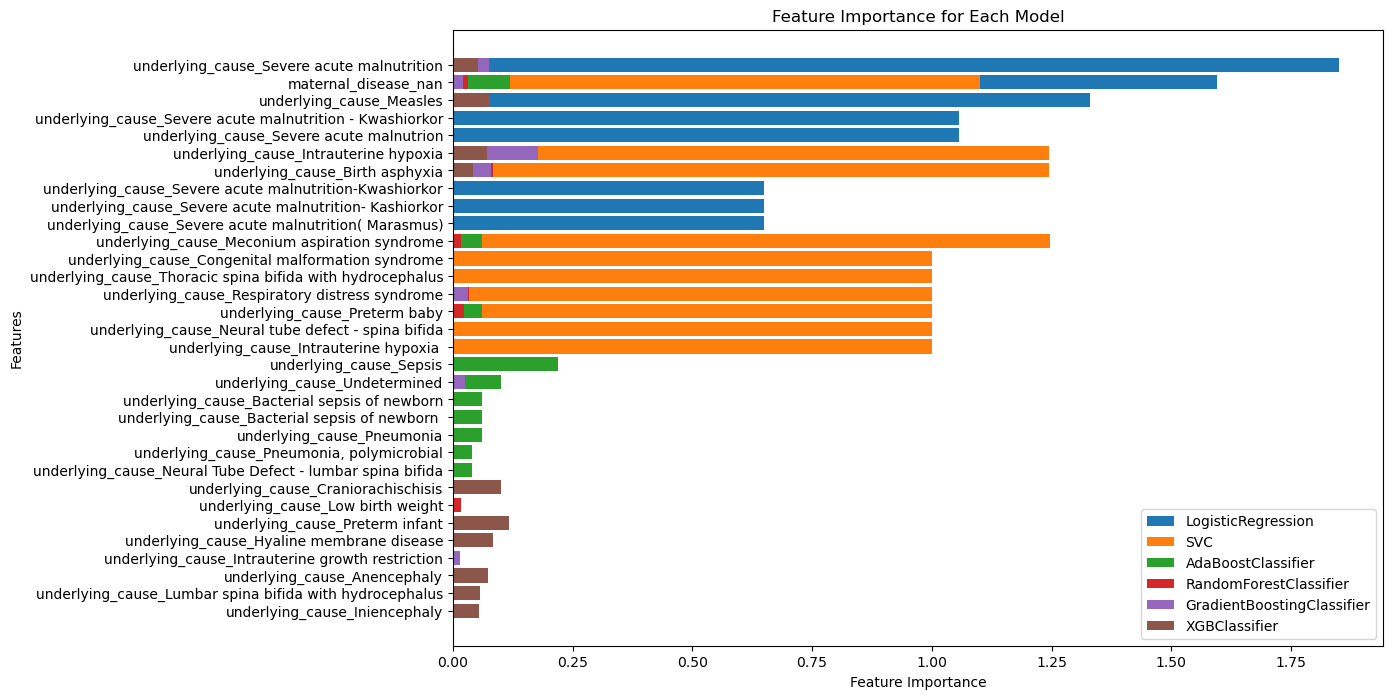

In [54]:
feature_names = full_pipeline.named_steps['encoder'].transformers_[0][1].get_feature_names_out(['underlying_cause', 'maternal_disease'])


feature_importances_df = pd.DataFrame(feature_importances, index=feature_names)


plt.figure(figsize=(12, 8))

for model_name, importances in feature_importances.items():
    sorted_idx = importances.argsort()[::-1][:10]  # Select top 10 features
    features = feature_names[sorted_idx]
    importance = importances[sorted_idx]
    plt.barh(features, importance, label=model_name)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Each Model')
plt.legend()
plt.gca().invert_yaxis()  
plt.show()


##### 6B. Plot the Top Five Infant Underlying Causes of Child Death

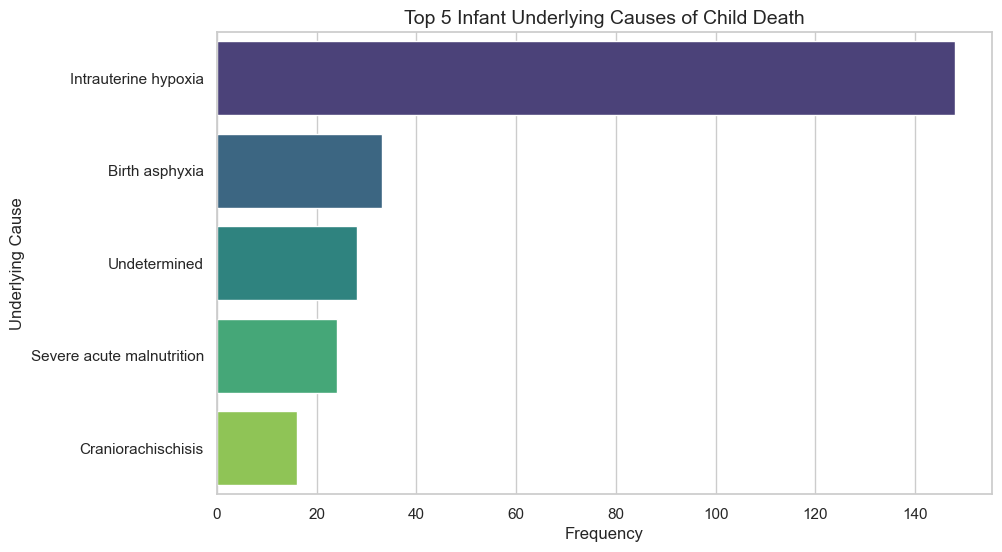

In [56]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=underlying_cause_counts.values, y=underlying_cause_counts.index, palette="viridis")
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Underlying Cause', fontsize=12)
plt.title('Top 5 Infant Underlying Causes of Child Death', fontsize=14)
plt.show()


#### 6C. Plot the Top Five Maternal Factors Contributing to Child Death

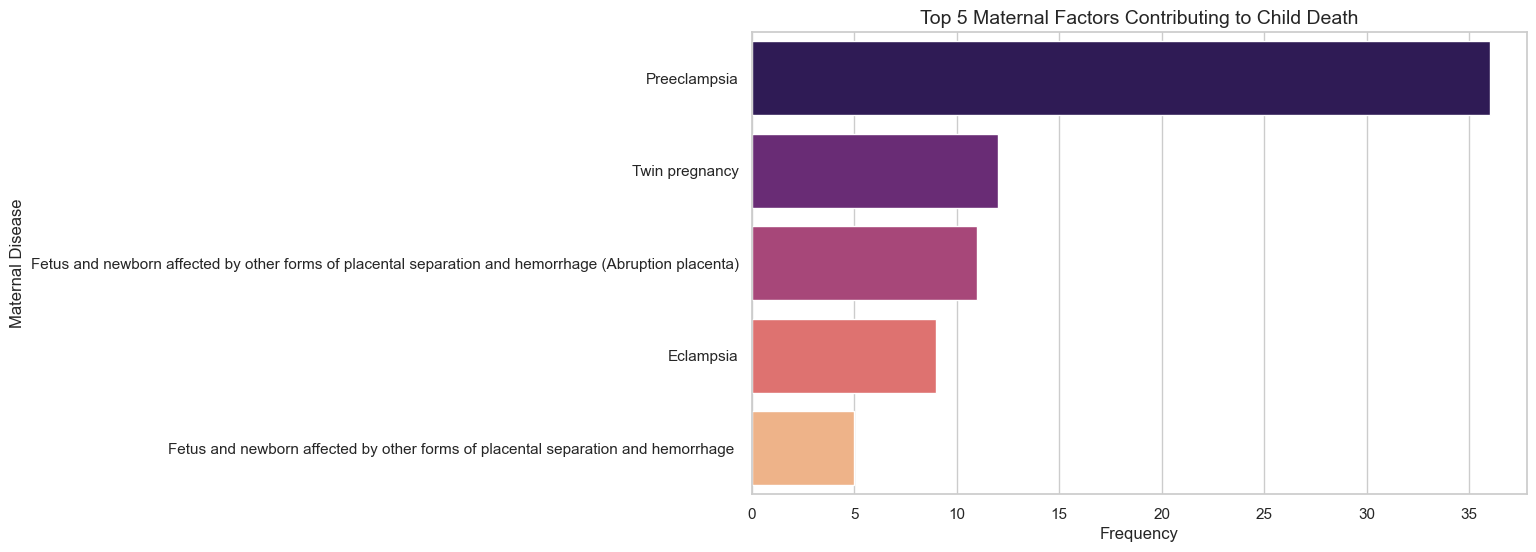

In [57]:
maternal_disease_counts = df['maternal_disease'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=maternal_disease_counts.values, y=maternal_disease_counts.index, palette="magma")
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Maternal Disease', fontsize=12)
plt.title('Top 5 Maternal Factors Contributing to Child Death', fontsize=14)
plt.show()


#### 6D. Plot the Child Death Based on the Case Types

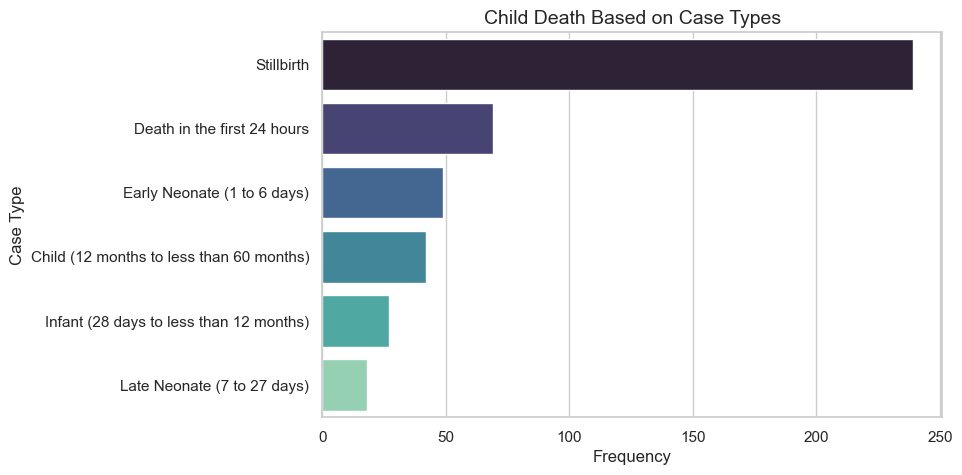

In [59]:
case_type_counts = df['case_type'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=case_type_counts.values, y=case_type_counts.index, palette="mako")
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Case Type', fontsize=12)
plt.title('Child Death Based on Case Types', fontsize=14)
plt.show()
